In [ ]:
### Data cleaning/preprocessing of text for NLTK/ML
# Retrival & Data assembly/cleaning preprocess for Natural Language Analysis and Machine Learning


In [18]:
# Imports
import io
from urllib.request import urlretrieve

In [19]:
# Download Alice in Wonderland from Project Gutenberg
    # Import text file with multiple paragraphs of text

    # Retrive file remotely and store in raw_data folder
        # From Project Gutenberg:
		# Alice’s Adventures in Wonderland, Lewis Carroll
            # https://www.gutenberg.org/files/11/11-0.txt

url = "https://www.gutenberg.org/files/11/11-0.txt"
urlretrieve(url, "raw_data/alice.txt")

('raw_data/alice.txt', <http.client.HTTPMessage at 0x191d920c550>)

In [20]:
# File encoding read check 
    # File is utf-8 encoded
with io.open('raw_data/alice.txt','r+',encoding='utf8') as f:
    text = f.read()
    print(f.encoding)
    f.close()

utf8


In [ ]:
#print(text)

In [22]:
# Removal of header and footer 
    # Alternative option:https://github.com/c-w/Gutenberg

In [23]:
text.find("CHAPTER I")

712

In [24]:
text.rfind("End of Project Gutenberg’s")

145065

In [25]:
#print(text[712:145065])

In [26]:
text_cleaned = text[712:145065]

In [27]:
with io.open('raw_data/alice_cleaned.txt','w+',encoding='utf8') as f:
    f.write(text_cleaned)
    print(f.encoding)
    f.close()

utf8


In [28]:
#import codecs
#f = codecs.open('raw_data/alice.txt', 'r', 'UTF-8')
#for line in f:
    #print(line)


In [ ]:
import nltk
# Download all popular nltk packages
#nltk.download('popular')



#run function to open nltk downloader and download required packages
#nltk.download()

In [ ]:
tokens = [t for t in text_cleaned.split()]

In [ ]:
# Count word frequency
freq = nltk.FreqDist(tokens)
for key,val in freq.items():
    print (str(key) + ':' + str(val))

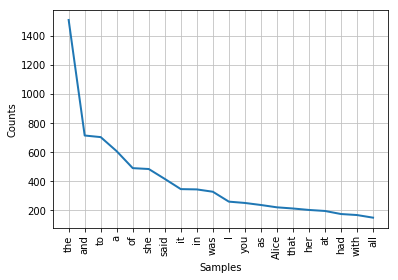

In [17]:
#plt.figure(figsize=(12,8))
freq.plot(20, cumulative=False)

In [ ]:
# Removal of stopwords 
from nltk.corpus import stopwords
nltk.download('stopwords')
tokens = [t for t in text_cleaned.split()]
clean_tokens = tokens[:]
sr = stopwords.words('english')
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)

for key,val in freq.items():
    print (str(key) + ':' + str(val))


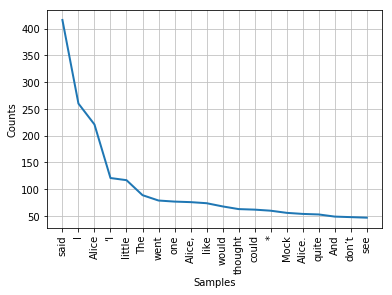

In [30]:
#plt.figure(figsize=(12,8))
freq.plot(20, cumulative=False)

In [ ]:
# Tokenize sentences/text
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
#print(sent_tokenize(text))
#print(word_tokenize(text))

In [ ]:
# Part-of-speech tagging (POS/POST)
text_wt = word_tokenize(text)
pos_tagged_text = nltk.pos_tag(text_wt)
pos_tagged_text

In [ ]:
# POS tagging to pandas dataframe/histogram/heuristics 

In [ ]:
#from nltk.stem import WordNetLemmatizer
#from nltk.stem import PorterStemmer
 
#stemmer = PorterStemmer() 
#lemmatizer = WordNetLemmatizer()

In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None # for easy if-statement 

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tagged = nltk.pos_tag(tokens)
for word, tag in tagged:
    wntag = get_wordnet_pos(tag)
    if wntag is None:# not supply tag in case of None
        lemma = lemmatizer.lemmatize(word) 
    else:
        lemma = lemmatizer.lemmatize(word, pos=wntag)